In [4]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 163s 14us/step


In [9]:
x_train[0].shape

(28, 28)

In [33]:
x_train=x_train/255   # scaling data for better accuracy
x_test=x_test/255

In [34]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

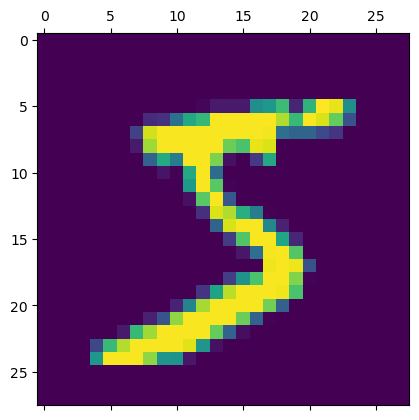

In [35]:
plt.matshow(x_train[0]) #contains handwritten image

In [36]:
y_train[0]#contains a number

5

In [37]:
x_train.shape #1 no of samples,2 and 3 each individual image

(60000, 28, 28)

In [38]:
#flatten your image means convert it to 2d to 1d array
x1_flat=x_train.reshape(len(x_train),28*28)
x2_flat=x_test.reshape(len(x_test),28*28)

In [39]:
x1_flat.shape #now it is oneD array
x2_flat.shape

(10000, 784)

In [40]:
#create  a simple newural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x1_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4677 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9259


In [41]:
model.evaluate(x2_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9244


[0.2692020833492279, 0.9243999719619751]

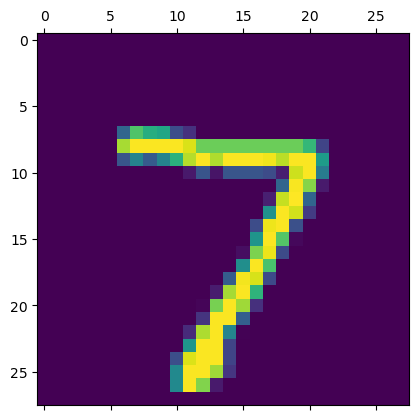

In [29]:
plt.matshow(x_test[0])

In [42]:
y_predicted=model.predict(x2_flat)
y_predicted[0]

313/313 [==============================] - 1s 4ms/step


array([1.8696766e-02, 3.6279528e-07, 5.6944411e-02, 9.5536435e-01,
       2.1433819e-03, 9.7732261e-02, 1.8490085e-06, 9.9979728e-01,
       8.8411041e-02, 7.0214272e-01], dtype=float32)

In [43]:
np.argmax(y_predicted[0]) #maximum value and print index of that value

7

In [44]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  939,   12,    6,    2,   14,   10,   30,    6],
       [   2,    0,   25,  918,    0,   19,    3,   11,   16,   16],
       [   1,    1,    8,    0,  891,    0,   15,    4,    8,   54],
       [   9,    3,    5,   37,    9,  766,   19,    9,   26,    9],
       [   9,    3,    8,    1,    7,    9,  918,    2,    1,    0],
       [   1,    5,   24,    6,    5,    0,    0,  946,    2,   39],
       [   7,    9,    9,   19,    9,   25,   11,   12,  849,   24],
       [  10,    7,    2,    8,   14,    6,    0,   17,    4,  941]])>

Text(95.72222222222221, 0.5, 'Truth')

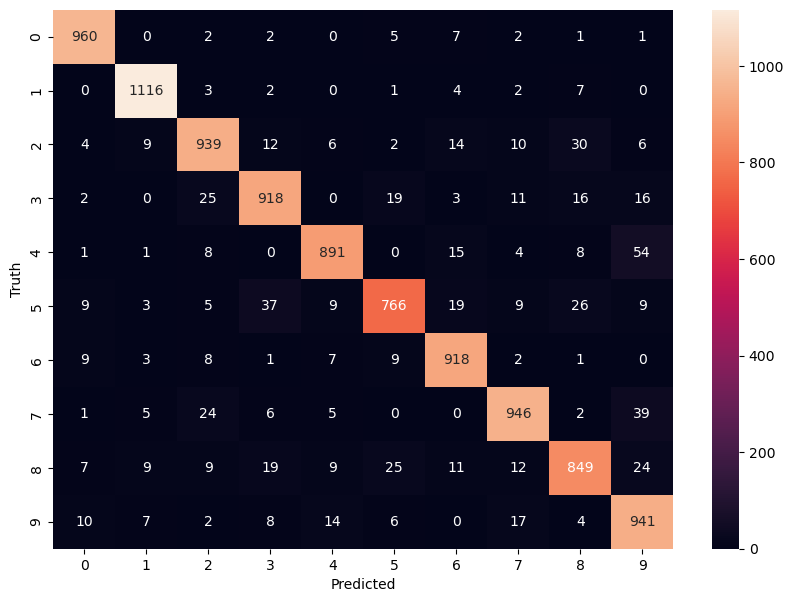

In [48]:
'Fancy visualization of confusion matrix'
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
'diagonals are model predicted number well and black are errors'
'now am going to add hidden layer and lets see if performance improves or not'

In [49]:
#create  a  newural network with hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x1_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1219 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0851 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0512 - accuracy: 0.9839


In [50]:
model.evaluate(x2_flat,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0766 - accuracy: 0.9774


[0.07664191722869873, 0.977400004863739]

Text(95.72222222222221, 0.5, 'Truth')

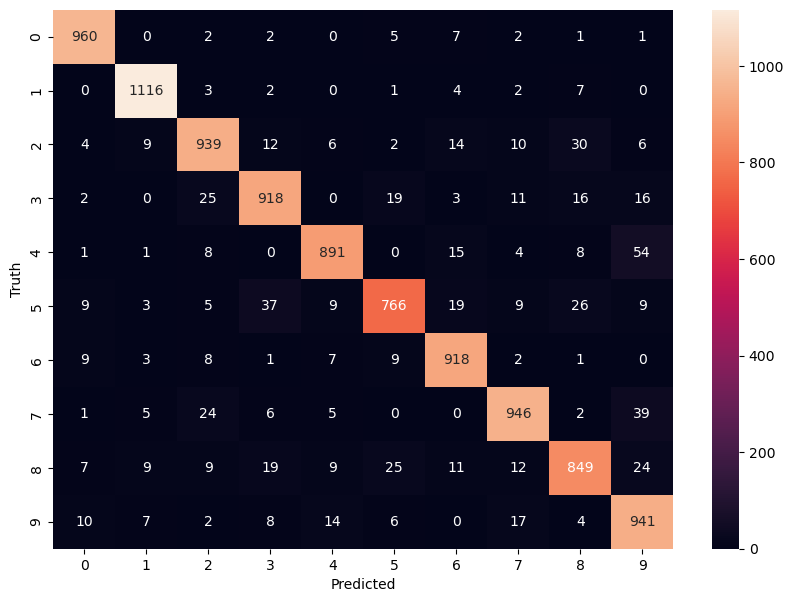

In [51]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
'Fancy visualization of confusion matrix'
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
'keras provide you to flattend data'
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#flattening
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2659 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1201 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0509 - accuracy: 0.9840
